In [5]:
# Step 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Show plots inside notebook
%matplotlib inline

# Set style
sns.set(style="whitegrid")

data_path = r'C:\Users\ayedr\week-5-credit-risk-model\data\raw\XenteDataset.csv'
df = pd.read_csv(data_path)
df.head()



,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
# Shape of the dataset
print("Number of rows and columns:", df.shape)

# Data types and non-null counts
df.info()


Number of rows and columns: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 no

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


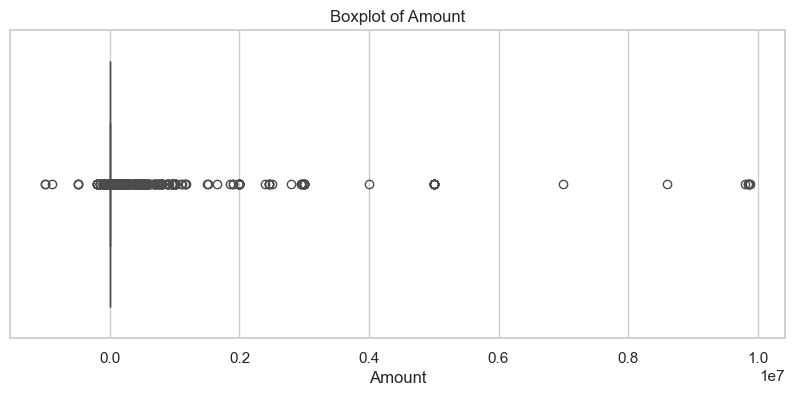

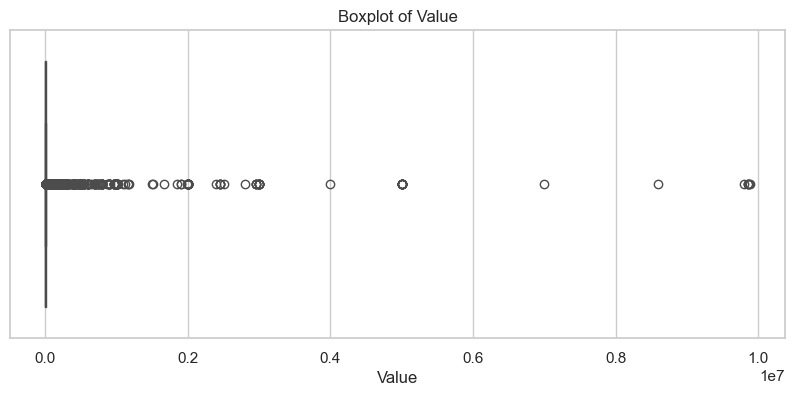

In [9]:
#Investigate Outliers byvisualizing those outliers for Amount and Value
for col in ['Amount', 'Value']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [15]:
#Detecting Outliers Using IQR Method
def flag_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_flag = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return outlier_flag

# Flag outliers in Amount and Value
df['Outlier_Amount_IQR'] = flag_outliers_iqr(df, 'Amount')
df['Outlier_Value_IQR'] = flag_outliers_iqr(df, 'Value')
print("Outliers in Amount (IQR):", df['Outlier_Amount_IQR'].sum())
print("Outliers in Value (IQR):", df['Outlier_Value_IQR'].sum())



Outliers in Amount (IQR): 24441
Outliers in Value (IQR): 9021


In [16]:
#Detecting the  Outliers Using Z-Score Method
#Z-score works better on normal (bell-shaped) distributions:


from scipy.stats import zscore

# Compute z-scores
df['Z_Amount'] = zscore(df['Amount'])
df['Z_Value'] = zscore(df['Value'])

# Flag outliers (commonly |z| > 3)
df['Outlier_Amount_Z'] = df['Z_Amount'].abs() > 3
df['Outlier_Value_Z'] = df['Z_Value'].abs() > 3
print("Outliers in Amount (Z-Score):", df['Outlier_Amount_Z'].sum())
print("Outliers in Value (Z-Score):", df['Outlier_Value_Z'].sum())


Outliers in Amount (Z-Score): 269
Outliers in Value (Z-Score): 269


In [19]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import os

# Step 1: Load the raw data
data_path = r'C:\Users\ayedr\week-5-credit-risk-model\data\raw\XenteDataset.csv'
df = pd.read_csv(data_path)

# Step 2: Drop constant columns
df.drop(columns=['CurrencyCode', 'CountryCode'], inplace=True)

# Step 3: Flag outliers using IQR
def flag_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((df[column] < lower_bound) | (df[column] > upper_bound))

df['Outlier_Amount_IQR'] = flag_outliers_iqr(df, 'Amount')
df['Outlier_Value_IQR'] = flag_outliers_iqr(df, 'Value')

# Step 4: Flag outliers using Z-score
df['Z_Amount'] = zscore(df['Amount'])
df['Z_Value'] = zscore(df['Value'])
df['Outlier_Amount_Z'] = df['Z_Amount'].abs() > 3
df['Outlier_Value_Z'] = df['Z_Value'].abs() > 3

# Step 5: Drop outliers using your preferred method (e.g., Z-Score)
df_cleaned = df[~(df['Outlier_Amount_Z'] | df['Outlier_Value_Z'])].copy()

# Step 6: Save cleaned data to processed/
processed_path = r'C:/Users/ayedr/week-5-credit-risk-model/data/processed/cleaned_data.csv'
os.makedirs(os.path.dirname(processed_path), exist_ok=True)
df_cleaned.to_csv(processed_path, index=False)

print(f"✅ Cleaned data saved to: {processed_path}")


✅ Cleaned data saved to: C:/Users/ayedr/week-5-credit-risk-model/data/processed/cleaned_data.csv
